# Week 6 – Challenges

## Accident database enrichment

The database of accidents has been downloaded from a government website. It does not have any adresses geolocalized. Your goal in this challenge is get use to update yoru odata with an API. We will use Baidu API to query the adresses and obtain a location. 

### API call 

🤔 follow the steps from the course to get your own API key and try to get query baidu to get an an adress geolocalized. Store the result in longitude and latitude variables

In [1]:
# some import might be useful
import requests

In [11]:
adress = '静安区延安西路129号华侨大厦5楼'

# CODE FROM THE COURSE WEEK6 COURSE PART 1
baidu_api_url = 'https://api.map.baidu.com'
baidu_api_endpoint = '/geocoding/v3/'

with open('baidu_ak',encoding='utf-8') as fp:
    baidu_application_key = fp.read().strip()

address_in_china = {'city':'上海市','address':adress}
params = {
'city': address_in_china['city'],
'address': address_in_china['address'],
'output':'json',
'ret_coordtype':'gcj02ll',
'ak': baidu_application_key
}

query_parameters = '&'.join([f'{k}={v}' for k,v in params.items()]) 
query = f'{baidu_api_url}{baidu_api_endpoint}?{query_parameters}'
print('the query looks like this', query)

r = requests.get(query)
data = r.json()
latitude = data['result']['location']['lat']
longitude = data['result']['location']['lng']

print(longitude, latitude)

the query looks like this https://api.map.baidu.com/geocoding/v3/?city=上海市&address=静安区延安西路129号华侨大厦5楼&output=json&ret_coordtype=gcj02ll&ak=Bhz1k96WswcbYB5kxM94GIl503zVYaoS
121.44368714453374 31.219767080567962


🤔 now that the address is geolocalized we still need to unshift the coordinate. Right now the coordinate are in GCJ02 and we need them in WG84. Use the code from the course to unshift it. 

In [12]:
from coords import gcj02_decrypt

new_latitude ,new_longitude = gcj02_decrypt(latitude,longitude)
print(new_longitude, new_latitude)

121.43908224771697 31.221645079966176



### Use pandas to Query the database of addresses

Now that you are capable of getting one query right, let's try to query baidu for 100 accidents that happened on a street of your choice. 

the table is called __`roadtraffic`__ and the field are as follows:
- `ìd`	INTEGER	NULL	
- `address`	TEXT(255,0)	NULL	
- `date`	TEXT(255,0)	NULL	
- `cause`	TEXT(255,0)	NULL	
- `longitude`	real	Null	
- `latitude`	real	Null	
- `done`	TEXT	0	

🤔 step 1 create a pandas dataframe with a query in accidents.sqlite on the table `roadtraffic` selecting only the rows where `done` is not 1 and display the first 5 lines

In [1]:
# some import might be useful
import pandas as pd 
import sqlite3

In [ ]:
file = "./accidents.sqlite"
con = sqlite3.connect(file)
query = '''
SELECT *
FROM roadtraffic
WHERE done != 1
''

In [3]:
df = pd.read_sql_query(query, con)
df.head(n=5)

,id,address,date,cause,longitude,latitude,done
0,3101010200700018,西藏南路、方浜西路,2007-06-25 12:32:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,None,None,0
1,3101010200700068,南京西路、新昌路,2007-06-15 21:00:00.0,上海市公安局黄浦分局交通警察支队机动责任区,None,None,0
2,3101010200700079,复兴东路、四牌楼路,2007-06-15 05:30:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,None,None,0
3,3101010200700081,南仓街82弄,2007-01-21 11:00:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,None,None,0
4,3101010200700100,四川中路、香港路,2007-06-23 08:45:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,None,None,0


🤔 step 2 select the rows where your street address name is in the address field as a new dataframe

In [4]:
df_zhongshan = df.loc[df.address.str.contains('中山南路')].sample(100)
df_zhongshan

,id,address,date,cause,longitude,latitude,done
81626,3101014201515269,中山南路董家渡路北约0米,2015-09-24 09:00:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,None,None,0
93092,3101015201309485,董家渡路中山南路东约5米,2013-05-18 17:19:00.0,绿地分中心,None,None,0
98917,3101015201603292,西藏南路中山南路南约0米,2016-02-16 14:00:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,None,None,0
141339,3101018201202829,中山南路油车码头街南约2米,2012-03-27 14:04:00.0,上海市公安局黄浦分局交通警察支队隧桥责任区,None,None,0
8543,3101010201300026,西藏南路进中山南路南约5米,2013-01-01 10:18:00.0,上海市公安局黄浦分局交通警察支队七中队,None,None,0
...,...,...,...,...,...,...,...
113045,3101016201420117,中山南路西藏南路南约1米,2014-11-22 20:00:00.0,沪仑分中心,None,None,0
13510,3101010201505411,中山南路复兴东路东约20米,2015-01-19 12:10:00.0,星州分中心,None,None,0
75945,3101014201300132,中山南路赖义码头街南约0米,2013-01-05 10:53:00.0,上海市公安局黄浦分局交通警察支队隧桥责任区,None,None,0
17930,3101011200807473,中山南路董家渡路,2008-06-07 17:38:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,None,None,0


In [37]:
df_zhongshan.address.unique()

array(['中山南路南车站路00米', '中山南路近东门路（绿地中心）', '中山南路油车码头街00米', '中山南路西藏南路南约0米',
       '中山南路王家码头路00米', '中山南路多稼路00米', '中山南路国货路东约10米', '中山南路会馆码头街东约0米',
       '中山南路近南京东路', '中山南路白渡路00米', '中山南路董家渡路00米', '中山南路近会馆码头街（绿地中心）',
       '中山南路、董家渡路', '中山南路近西藏南路（绿地中心）', '中山南路进东门路北约30米', '中山南路瞿溪路00米',
       '中山南一路中山南路00米', '中山南路南车站路东约0米', '中山南路国货路00米', '中山南路进薛家浜路北约20米',
       '中山南路近丰记码头街', '中山南路198弄门口', '中山南路出老太平弄东约30米', '南车站路中山南路北约0米',
       '薛家浜路中山南路00米', '陆家浜路中山南路西约1米', '中山南路西藏南路南约1米', '中山南路陆家浜路00米',
       '中山南路毛家园北约10米', '中山南路进白渡路南约10米', '中山南路、西藏南路东侧', '中山南路白渡路北约1米',
       '南车站路中山南路东约20米', '中山南路油车码头街北约20米', '南车站路出中山南路南约30米', '陆家浜路中山南路00米',
       '中山南路复兴东路东约0米', '中山南路丰记码头街西约0米', '中山南路复兴东路东约00米', '中山南路保屯路00米',
       '中山南路南车站路西约50米', '中山南路近复兴东路', '中山南路200弄地库', '董家渡路中山南路00米',
       '中山南路多稼路北约10米', '中山南路、西藏南路', '中山南路复兴东路北约1米', '中山南路进董家渡路东约30米',
       '复兴东路中山南路00米', '中山南路进赖义码头街南约5米', '中山南路，油车码头', '中山南路进新码头街北约5米',
       '中山南路沪军营路00米', '中山南路28号地下车库', '中山南路新码头街南约0米', '中山南路西藏南路00米',
       '陆家浜路中山南路西约30

🤔 step 3 for each of these rows, query baidu to location AND unshift it to WGS84. Save the result in the new dataframe you just created

In [5]:
row = df_zhongshan[df_zhongshan.done !=1].sample(1)
row

,id,address,date,cause,longitude,latitude,done
34338,3101012200704323,中山南路28号,2007-09-29 13:20:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,None,None,0


In [8]:
df_zhongshan.address = df_zhongshan.address.apply(lambda s: re.sub('(([西南东北]约)?\d+米)','',s))

In [7]:
import re

In [13]:
def query_baidu(address):
    adress = address
    baidu_api_url = 'https://api.map.baidu.com'
    baidu_api_endpoint = '/geocoding/v3/'
    with open('baidu_ak',encoding='utf-8') as fp:
        baidu_application_key = fp.read().strip()

    address_in_china = {'city':'上海市','address':adress}
    params = {
    'city': address_in_china['city'],
    'address': address_in_china['address'],
    'output':'json',
    'ret_coordtype':'gcj02ll',
    'ak': baidu_application_key
    }

    query_parameters = '&'.join([f'{k}={v}' for k,v in params.items()]) 
    query = f'{baidu_api_url}{baidu_api_endpoint}?{query_parameters}'
    #print('the query looks like this', query)
    
    r = requests.get(query)
    data = r.json()
    latitude = data['result']['location']['lat']
    longitude = data['result']['location']['lng']
    lat, lon = gcj02_decrypt(latitude, longitude)
    return(lon, lat)

while len(df_zhongshan[df_zhongshan.done !=1])>0:
    row = df_zhongshan[df_zhongshan.done !=1].sample(1)
    print(row.index)
    address = str(row.address)
    lon,lat = query_baidu(address)
    df_zhongshan.at[row.index,'done'] = 1
    df_zhongshan.at[row.index,'longitude'] =lon
    df_zhongshan.at[row.index,'latitude'] = lat
    #print(row.address,address)
    #break
df_zhongshan

Int64Index([3647], dtype='int64')
Int64Index([34755], dtype='int64')
Int64Index([109877], dtype='int64')
Int64Index([162570], dtype='int64')
Int64Index([140567], dtype='int64')
Int64Index([80620], dtype='int64')
Int64Index([75945], dtype='int64')
Int64Index([98917], dtype='int64')
Int64Index([157155], dtype='int64')
Int64Index([16651], dtype='int64')
Int64Index([70077], dtype='int64')
Int64Index([106784], dtype='int64')
Int64Index([51780], dtype='int64')
Int64Index([3967], dtype='int64')
Int64Index([30757], dtype='int64')
Int64Index([6846], dtype='int64')
Int64Index([141339], dtype='int64')
Int64Index([34338], dtype='int64')
Int64Index([12514], dtype='int64')
Int64Index([8587], dtype='int64')
Int64Index([149276], dtype='int64')
Int64Index([138701], dtype='int64')
Int64Index([124229], dtype='int64')
Int64Index([154315], dtype='int64')
Int64Index([120827], dtype='int64')
Int64Index([59400], dtype='int64')
Int64Index([137758], dtype='int64')
Int64Index([62232], dtype='int64')
Int64Index([

,id,address,date,cause,longitude,latitude,done
81626,3101014201515269,中山南路董家渡路,2015-09-24 09:00:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,121.497618,31.216882,1
93092,3101015201309485,董家渡路中山南路,2013-05-18 17:19:00.0,绿地分中心,121.499827,31.21325,1
98917,3101015201603292,西藏南路中山南路,2016-02-16 14:00:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,121.499827,31.21325,1
141339,3101018201202829,中山南路油车码头街,2012-03-27 14:04:00.0,上海市公安局黄浦分局交通警察支队隧桥责任区,121.499827,31.21325,1
8543,3101010201300026,西藏南路进中山南路,2013-01-01 10:18:00.0,上海市公安局黄浦分局交通警察支队七中队,121.481952,31.212948,1
...,...,...,...,...,...,...,...
113045,3101016201420117,中山南路西藏南路,2014-11-22 20:00:00.0,沪仑分中心,121.481952,31.212948,1
13510,3101010201505411,中山南路复兴东路,2015-01-19 12:10:00.0,星州分中心,121.48468,31.223621,1
75945,3101014201300132,中山南路赖义码头街,2013-01-05 10:53:00.0,上海市公安局黄浦分局交通警察支队隧桥责任区,121.499827,31.21325,1
17930,3101011200807473,中山南路董家渡路,2008-06-07 17:38:00.0,上海市公安局黄浦分局交通警察支队事故违章审理科,121.497618,31.216882,1


### create a geopandas dataframe 

🤔 step 4 create a geopandas dataframe from the pandas dataframe. initialize the geometry column using the geopandas function [points_from_xy](https://geopandas.org/docs/reference/api/geopandas.points_from_xy.html?highlight=points_from#geopandas.points_from_xy) and initialize the crs (the projection) to 4326 (you can check it on [epsg.io/4326](https://epsg.io/4326))

In [16]:
import geopandas as gpd

In [31]:
gdf = gpd.GeoDataFrame(df_zhongshan, geometry=gpd.points_from_xy(df_zhongshan['longitude'],df_zhongshan['latitude']), crs=4326 )

🤔 step 5 plot the points using the plot function 

<AxesSubplot:>

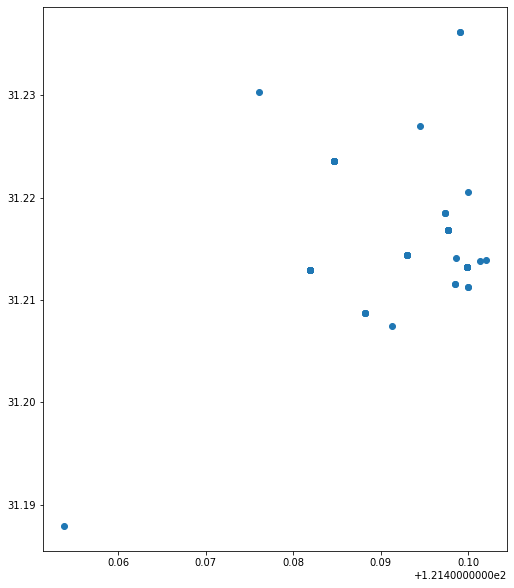

In [32]:
gdf.plot(figsize=(15,10))

🤔 step 6 optionnal, plot using a shanghai basemap like in the course

In [22]:
china = gpd.read_file('./gadm36_CHN_shp.zip')
gdf_shanghai = gdf.intersection(china)

/home/mathis/.virtualenvs/data_env/lib/python3.8/site-packages/geopandas/base.py:32: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [24]:
import contextily as ctx

In [25]:
URL = "https://api.mapbox.com/styles/v1/mathisbing/ckoc981rd09l018nz8foy0k2k/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoibWF0aGlzYmluZyIsImEiOiJja29jOHowYW4yY2ExMnZydzdqbTZzZ3NvIn0.Wf0Uo1mBoRUmgyTRyXbxFw"

<ipython-input-35-08b4c2d556bd>:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  ctx.add_basemap(ax,url=URL, crs=gdf.crs.to_string())


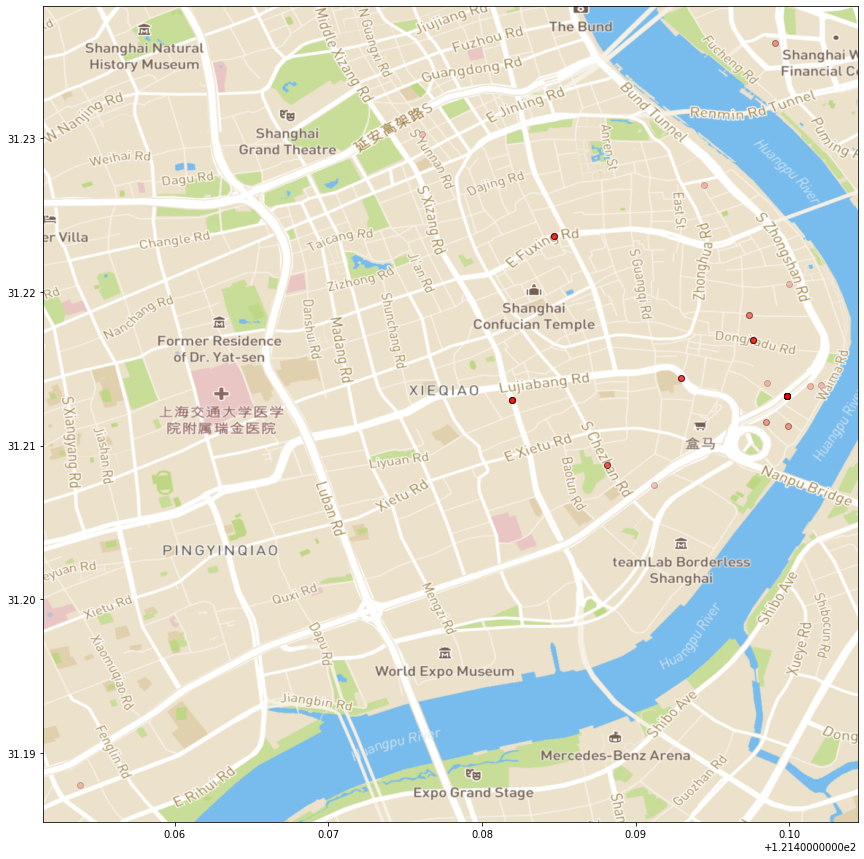

In [35]:
ax = gdf.plot(figsize=(15, 15), alpha=0.2, color='red', edgecolor='k')
ctx.add_basemap(ax,source=URL, crs=gdf.crs.to_string())

## mobike speed experiment

To provide a new option on a housing website, a real estate company contact you and ask you how far from a subway station is a 10min bike ride. To answer this question you need to know the speed at wich people bike in Shanghai in average. Fortunately you have a large dataset with bike travel that could provide this exact information. So you are gonna get the average biking speed of a mobike user in Shanghai. 

In [1]:
import pandas as pd

🤔 step 1 load the mobike dataframe into a normal pandas dataframe

In [19]:
file2 = r"C:/Users/16051/ML/data/UTSEUS-MOBIKE-shanghai_full.csv"
df_bike = pd.read_csv(file2)
# df_bike

In [5]:
type(df_bike.start_time)

pandas.core.series.Series

🤔 step 2 adjust the column type for `start_time` and `end_time`

In [20]:
df_bike['start_time']=pd.to_datetime(df_bike['start_time'])
df_bike.end_time=pd.to_datetime(df_bike.end_time)

🤔 step 3 create a new column `elapsed time` with travel time in seconds

In [21]:
df_bike['elapsed_time']=(df_bike.end_time-df_bike.start_time).dt.total_seconds()

In [8]:
df_bike

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,elapsed time
0,1,324731,7541,2016-08-28 00:00:00,121.490,31.280,2016-08-28 00:08:00,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",480.0
1,6,288841,4427,2016-08-28 00:00:00,121.462,31.313,2016-08-28 00:17:00,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",1020.0
2,8,315873,6474,2016-08-28 00:00:00,121.416,31.154,2016-08-28 00:14:00,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",840.0
3,10,93155,12616,2016-08-28 00:00:00,121.436,31.320,2016-08-28 00:12:00,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",720.0
4,11,352484,11596,2016-08-28 00:00:00,121.459,31.325,2016-08-28 00:08:00,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",480.0
...,...,...,...,...,...,...,...,...,...,...,...
1023598,1807859,65563,200,2016-08-27 00:00:00,121.452,31.336,2016-08-27 00:12:00,121.450,31.325,"121.450,31.325#121.450,31.326#121.451,31.326#1...",720.0
1023599,1807860,7077,11733,2016-08-27 00:00:00,121.437,31.239,2016-08-27 00:34:00,121.423,31.275,"121.422,31.274#121.422,31.275#121.422,31.278#1...",2040.0
1023600,1807863,303152,10770,2016-08-26 23:59:00,121.518,31.291,2016-08-27 00:20:00,121.506,31.269,"121.503,31.272#121.503,31.273#121.504,31.271#1...",1260.0
1023601,1807864,283994,11009,2016-08-27 00:00:00,121.532,31.298,2016-08-27 00:19:00,121.539,31.290,"121.532,31.298#121.533,31.298#121.533,31.299#1...",1140.0


🤔 step 4 create a new column `path` and inside, create a `Shapely.geometry.LineString` (see the [manual]  (https://shapely.readthedocs.io/en/stable/manual.html#linestrings))using apply and the coordinate of the starting point and the end point

In [5]:
import geopandas as gpd
from shapely.geometry import LineString

In [22]:
def location(a,b,c,d):
    start = (a,b)
    end = (c,d)
    return LineString([start,end])
df_bike['path']=df_bike.apply(lambda df : location(df['start_location_x'],df['start_location_y'],df['end_location_x'],df['end_location_y']),axis=1)

In [23]:
df_bike['start_location'] = df_bike.apply(lambda df : (df['start_location_x'],df['start_location_y']),axis=1)

In [24]:
df_bike['end_location'] = df_bike.apply(lambda df : (df['end_location_x'],df['end_location_y']),axis=1)

In [13]:
df_bike

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,elapsed time,path,start_location,end_location
0,1,324731,7541,2016-08-28 00:00:00,121.490,31.280,2016-08-28 00:08:00,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",480.0,"LINESTRING (121.49 31.28, 121.486 31.273)","(121.49, 31.28)","(121.486, 31.273)"
1,6,288841,4427,2016-08-28 00:00:00,121.462,31.313,2016-08-28 00:17:00,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",1020.0,"LINESTRING (121.462 31.313, 121.455 31.315)","(121.462, 31.313)","(121.455, 31.315)"
2,8,315873,6474,2016-08-28 00:00:00,121.416,31.154,2016-08-28 00:14:00,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",840.0,"LINESTRING (121.416 31.154, 121.419 31.156)","(121.416, 31.154)","(121.419, 31.156)"
3,10,93155,12616,2016-08-28 00:00:00,121.436,31.320,2016-08-28 00:12:00,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",720.0,"LINESTRING (121.436 31.32, 121.444 31.31)","(121.436, 31.32)","(121.444, 31.31)"
4,11,352484,11596,2016-08-28 00:00:00,121.459,31.325,2016-08-28 00:08:00,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",480.0,"LINESTRING (121.459 31.325, 121.46 31.315)","(121.459, 31.325)","(121.46, 31.315)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023598,1807859,65563,200,2016-08-27 00:00:00,121.452,31.336,2016-08-27 00:12:00,121.450,31.325,"121.450,31.325#121.450,31.326#121.451,31.326#1...",720.0,"LINESTRING (121.452 31.336, 121.45 31.325)","(121.452, 31.336)","(121.45, 31.325)"
1023599,1807860,7077,11733,2016-08-27 00:00:00,121.437,31.239,2016-08-27 00:34:00,121.423,31.275,"121.422,31.274#121.422,31.275#121.422,31.278#1...",2040.0,"LINESTRING (121.437 31.239, 121.423 31.275)","(121.437, 31.239)","(121.423, 31.275)"
1023600,1807863,303152,10770,2016-08-26 23:59:00,121.518,31.291,2016-08-27 00:20:00,121.506,31.269,"121.503,31.272#121.503,31.273#121.504,31.271#1...",1260.0,"LINESTRING (121.518 31.291, 121.506 31.269)","(121.518, 31.291)","(121.506, 31.269)"
1023601,1807864,283994,11009,2016-08-27 00:00:00,121.532,31.298,2016-08-27 00:19:00,121.539,31.290,"121.532,31.298#121.533,31.298#121.533,31.299#1...",1140.0,"LINESTRING (121.532 31.298, 121.539 31.29)","(121.532, 31.298)","(121.539, 31.29)"


fpfaende@utc.fr

🤔 step 5 create a geodataframe from this dataframe and set the geometry column to the linestring column `path` and the crs to 4326

In [39]:
gdf_bike = gpd.GeoDataFrame(df_bike,geometry=df_bike['path'],crs="EPSG:4326")

In [40]:
gdf_bike['geo_wgs'] = gdf_bike['geometry']

In [27]:
gdf_bike

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,elapsed_time,path,start_location,end_location,geometry,geo_wgs
0,1,324731,7541,2016-08-28 00:00:00,121.490,31.280,2016-08-28 00:08:00,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",480.0,"LINESTRING (121.49 31.28, 121.486 31.273)","(121.49, 31.28)","(121.486, 31.273)","LINESTRING (121.49000 31.28000, 121.48600 31.2...","LINESTRING (121.49000 31.28000, 121.48600 31.2..."
1,6,288841,4427,2016-08-28 00:00:00,121.462,31.313,2016-08-28 00:17:00,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",1020.0,"LINESTRING (121.462 31.313, 121.455 31.315)","(121.462, 31.313)","(121.455, 31.315)","LINESTRING (121.46200 31.31300, 121.45500 31.3...","LINESTRING (121.46200 31.31300, 121.45500 31.3..."
2,8,315873,6474,2016-08-28 00:00:00,121.416,31.154,2016-08-28 00:14:00,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",840.0,"LINESTRING (121.416 31.154, 121.419 31.156)","(121.416, 31.154)","(121.419, 31.156)","LINESTRING (121.41600 31.15400, 121.41900 31.1...","LINESTRING (121.41600 31.15400, 121.41900 31.1..."
3,10,93155,12616,2016-08-28 00:00:00,121.436,31.320,2016-08-28 00:12:00,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",720.0,"LINESTRING (121.436 31.32, 121.444 31.31)","(121.436, 31.32)","(121.444, 31.31)","LINESTRING (121.43600 31.32000, 121.44400 31.3...","LINESTRING (121.43600 31.32000, 121.44400 31.3..."
4,11,352484,11596,2016-08-28 00:00:00,121.459,31.325,2016-08-28 00:08:00,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",480.0,"LINESTRING (121.459 31.325, 121.46 31.315)","(121.459, 31.325)","(121.46, 31.315)","LINESTRING (121.45900 31.32500, 121.46000 31.3...","LINESTRING (121.45900 31.32500, 121.46000 31.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023598,1807859,65563,200,2016-08-27 00:00:00,121.452,31.336,2016-08-27 00:12:00,121.450,31.325,"121.450,31.325#121.450,31.326#121.451,31.326#1...",720.0,"LINESTRING (121.452 31.336, 121.45 31.325)","(121.452, 31.336)","(121.45, 31.325)","LINESTRING (121.45200 31.33600, 121.45000 31.3...","LINESTRING (121.45200 31.33600, 121.45000 31.3..."
1023599,1807860,7077,11733,2016-08-27 00:00:00,121.437,31.239,2016-08-27 00:34:00,121.423,31.275,"121.422,31.274#121.422,31.275#121.422,31.278#1...",2040.0,"LINESTRING (121.437 31.239, 121.423 31.275)","(121.437, 31.239)","(121.423, 31.275)","LINESTRING (121.43700 31.23900, 121.42300 31.2...","LINESTRING (121.43700 31.23900, 121.42300 31.2..."
1023600,1807863,303152,10770,2016-08-26 23:59:00,121.518,31.291,2016-08-27 00:20:00,121.506,31.269,"121.503,31.272#121.503,31.273#121.504,31.271#1...",1260.0,"LINESTRING (121.518 31.291, 121.506 31.269)","(121.518, 31.291)","(121.506, 31.269)","LINESTRING (121.51800 31.29100, 121.50600 31.2...","LINESTRING (121.51800 31.29100, 121.50600 31.2..."
1023601,1807864,283994,11009,2016-08-27 00:00:00,121.532,31.298,2016-08-27 00:19:00,121.539,31.290,"121.532,31.298#121.533,31.298#121.533,31.299#1...",1140.0,"LINESTRING (121.532 31.298, 121.539 31.29)","(121.532, 31.298)","(121.539, 31.29)","LINESTRING (121.53200 31.29800, 121.53900 31.2...","LINESTRING (121.53200 31.29800, 121.53900 31.2..."


🤔 step 6 convert this geodataframe wuth a new crs, in meters this time (check the [to_crs function](https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.to_crs.html?highlight=to_crs#geopandas.GeoDataFrame.to_crs))

In [42]:
gdf_bike = gdf_bike.to_crs('EPSG:4576')
gdf_bike.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,elapsed_time,path,start_location,end_location,geometry,geo_wgs,speed
0,1,324731,7541,2016-08-28,121.490,31.280,2016-08-28 00:08:00,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1...",480.0,"LINESTRING (121.49 31.28, 121.486 31.273)","(121.49, 31.28)","(121.486, 31.273)","LINESTRING (21356201.509 3463063.940, 21355809...","LINESTRING (121.49000 31.28000, 121.48600 31.2...",0.000017
1,6,288841,4427,2016-08-28,121.462,31.313,2016-08-28 00:17:00,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1...",1020.0,"LINESTRING (121.462 31.313, 121.455 31.315)","(121.462, 31.313)","(121.455, 31.315)","LINESTRING (21353585.794 3466760.315, 21352922...","LINESTRING (121.46200 31.31300, 121.45500 31.3...",0.000007
2,8,315873,6474,2016-08-28,121.416,31.154,2016-08-28 00:14:00,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1...",840.0,"LINESTRING (121.416 31.154, 121.419 31.156)","(121.416, 31.154)","(121.419, 31.156)","LINESTRING (21348953.358 3449190.011, 21349242...","LINESTRING (121.41600 31.15400, 121.41900 31.1...",0.000004
3,10,93155,12616,2016-08-28,121.436,31.320,2016-08-28 00:12:00,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1...",720.0,"LINESTRING (121.436 31.32, 121.444 31.31)","(121.436, 31.32)","(121.444, 31.31)","LINESTRING (21351121.385 3467571.421, 21351867...","LINESTRING (121.43600 31.32000, 121.44400 31.3...",0.000018
4,11,352484,11596,2016-08-28,121.459,31.325,2016-08-28 00:08:00,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1...",480.0,"LINESTRING (121.459 31.325, 121.46 31.315)","(121.459, 31.325)","(121.46, 31.315)","LINESTRING (21353318.777 3468095.050, 21353398...","LINESTRING (121.45900 31.32500, 121.46000 31.3...",0.000021


🤔 step 7 create a new column `speed` with the length of your geometry in meters divided by the elapsed time in seconds

In [43]:
gdf_bike['speed'] = gdf_bike.geometry.length/gdf_bike.elapsed_time

🤔 step 8 plot the speed as a histogram and get the average speed. 

In [33]:
%matplotlib inline
import matplotlib
import seaborn as sns

In [44]:
gdf_bike['speed'].sort_values(ascending = False ).head(10)

86972     9118.745351
90433     3891.088210
411092    1186.907899
153666     634.950916
948167     506.016330
856049     499.329514
452184     397.148108
390276     318.837985
71712      275.228342
25413      239.675475
Name: speed, dtype: float64

<AxesSubplot:>

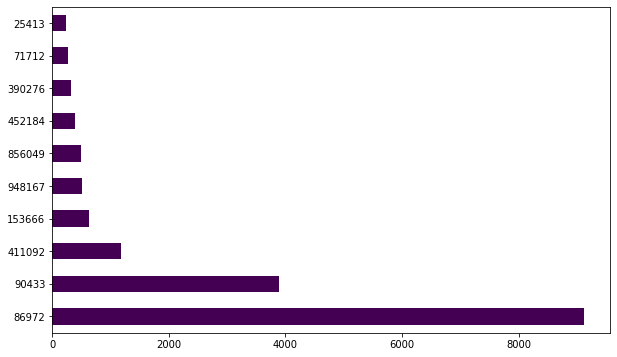

In [52]:
gdf_bike['speed'].sort_values(ascending = False ).head(10).plot(kind = 'barh', colormap='viridis', figsize=(10,6))

In [50]:
average = gdf_bike['speed'].mean()
average

1.8465469003793553

🤔 step 9 using this speed, calculate the distance corresponding to a 10min bike travel for the real estate company

In [54]:
distance = average* 10* 60
print(f'distance corresponding to a 10min bike travel for the real estate company is {distance}')

distance corresponding to a 10min bike travel for the real estate company is 1107.9281402276133


🤔 step 10 – *optionnal* – the speed can be adjusted and more precise if you use the path in the data instead of the starting and end coordinate. BUT be careful, the coordinates in the path are not ordered so you will have to reorder them. Once you have a clever algorithm, follow the steps again and provide a new estimation for the average speed 